## MODEL 2
### Using Pre-trained Model --- EfficientNetB2

### IMPORTED LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import efficientnet.keras as efn 
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from tensorflow.keras.layers import Lambda,Input,Dense,Flatten

from functions.visuals import *
from functions.check import score

from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Sequential
from glob import glob

2022-11-29 13:43:10.078093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### LOADING DATA & DEFINING VARIABLES

In [2]:
batch_size = 64                                # 64 images will be used in one iteration
img_size = [48, 48]                            # images are in 48 x 48 pixels

train = "/Users/sarbjitmadra/Desktop/Concordia/emotion_detection/emotions/train"
test = "/Users/sarbjitmadra/Desktop/Concordia/emotion_detection/emotions/test"

In [3]:
#Getting training dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
    train,                                 # directory
    labels="inferred",                     # labels were taken from directory
    shuffle = True,                        # shuffling data
    validation_split=0.2,                  # percentage of data to be used for validation
    subset= "training",                    # tells that subset belongs to training
    seed= 123,                             # random seed for shuffling
    image_size=(img_size),
    batch_size=batch_size)

Found 28571 files belonging to 7 classes.
Using 22857 files for training.


2022-11-29 13:43:17.105109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#Getting validation dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
    train,                                 
    labels="inferred",
    shuffle = True,                        
    validation_split=0.2,                  
    subset= "validation",                  # tells that subset belongs to validation
    seed= 123,                             
    image_size=(img_size),
    batch_size=batch_size)

Found 28571 files belonging to 7 classes.
Using 5714 files for validation.


In [5]:
#Getting test dataset

test_ds = tf.keras.utils.image_dataset_from_directory(
    test,                                 
    labels="inferred",
    shuffle = True,                                                     
    image_size=(img_size),
    batch_size=batch_size)

Found 7178 files belonging to 7 classes.


### GETTING CLASS NAMES OF IMAGES

In [6]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


### CONFIGURING THE DATASET

In [7]:
# Improves the performance by reducing the I/O.

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


### MODEL CREATION -- EfficientNetB2

In [8]:
# Defining the model

eff=EfficientNetB2(input_shape=img_size+[3],include_top=False)

In [9]:
# Stacking some layers

for layer in eff.layers:
    layer.trainable=False
    
x=Flatten()(eff.output)

prediction=Dense(len(train_ds),activation='softmax')(x)
model_2=Model(inputs=eff.input,outputs=prediction)

### COMPILING MODEL

In [10]:
model_2.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
# To view the layers of the model, UNCOMMENT THE MODEL SUMMARY

# model_2.summary()


In [12]:
# Defining the epochs

epochs = 30

In [13]:
#Fitting the new model with train and validation dateset with  epochs.

history = model_2.fit(train_ds,validation_data=val_ds,
                      epochs=epochs)

Epoch 1/30


/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


358/358 [==============================] - 99s 255ms/step - loss: 1.6461 - accuracy: 0.3674 - val_loss: 1.5209 - val_accuracy: 0.4123
Epoch 2/30
358/358 [==============================] - 109s 304ms/step - loss: 1.5096 - accuracy: 0.4222 - val_loss: 1.5136 - val_accuracy: 0.4207
Epoch 3/30
358/358 [==============================] - 102s 284ms/step - loss: 1.4788 - accuracy: 0.4367 - val_loss: 1.5256 - val_accuracy: 0.4176
Epoch 4/30
358/358 [==============================] - 110s 307ms/step - loss: 1.4394 - accuracy: 0.4498 - val_loss: 1.5458 - val_accuracy: 0.4086
Epoch 5/30
358/358 [==============================] - 111s 311ms/step - loss: 1.4127 - accuracy: 0.4644 - val_loss: 1.4931 - val_accuracy: 0.4333
Epoch 6/30
358/358 [==============================] - 116s 323ms/step - loss: 1.3894 - accuracy: 0.4721 - val_loss: 1.4810 - val_accuracy: 0.4323
Epoch 7/30
358/358 [==============================] - 107s 299ms/step - loss: 1.3778 - accuracy: 0.4792 - val_loss: 1.4557 - val_accurac

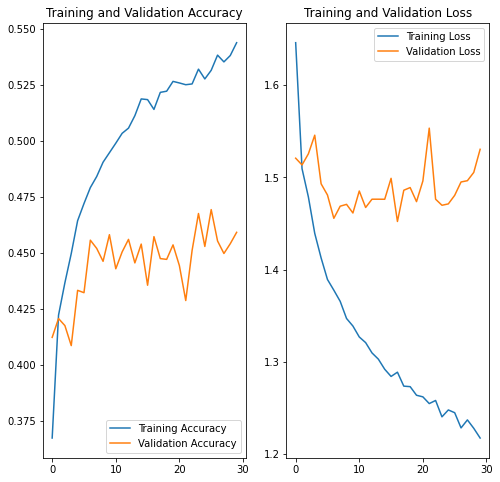

In [15]:
# Plotting accuracy and loss for both dataset.

plotting(history, epochs)

In [16]:
score(train_ds, model_2, 1)

358/358 [==============================] - 65s 181ms/step - loss: 1.1252 - accuracy: 0.5822
Loss: 1.125179648399353 
 Accuracy: 0.582184910774231


In [17]:
score(test_ds, model_2, 1)

113/113 [==============================] - 22s 190ms/step - loss: 1.5126 - accuracy: 0.4589
Loss: 1.512565016746521 
 Accuracy: 0.4589022099971771


### PREDICTIONS

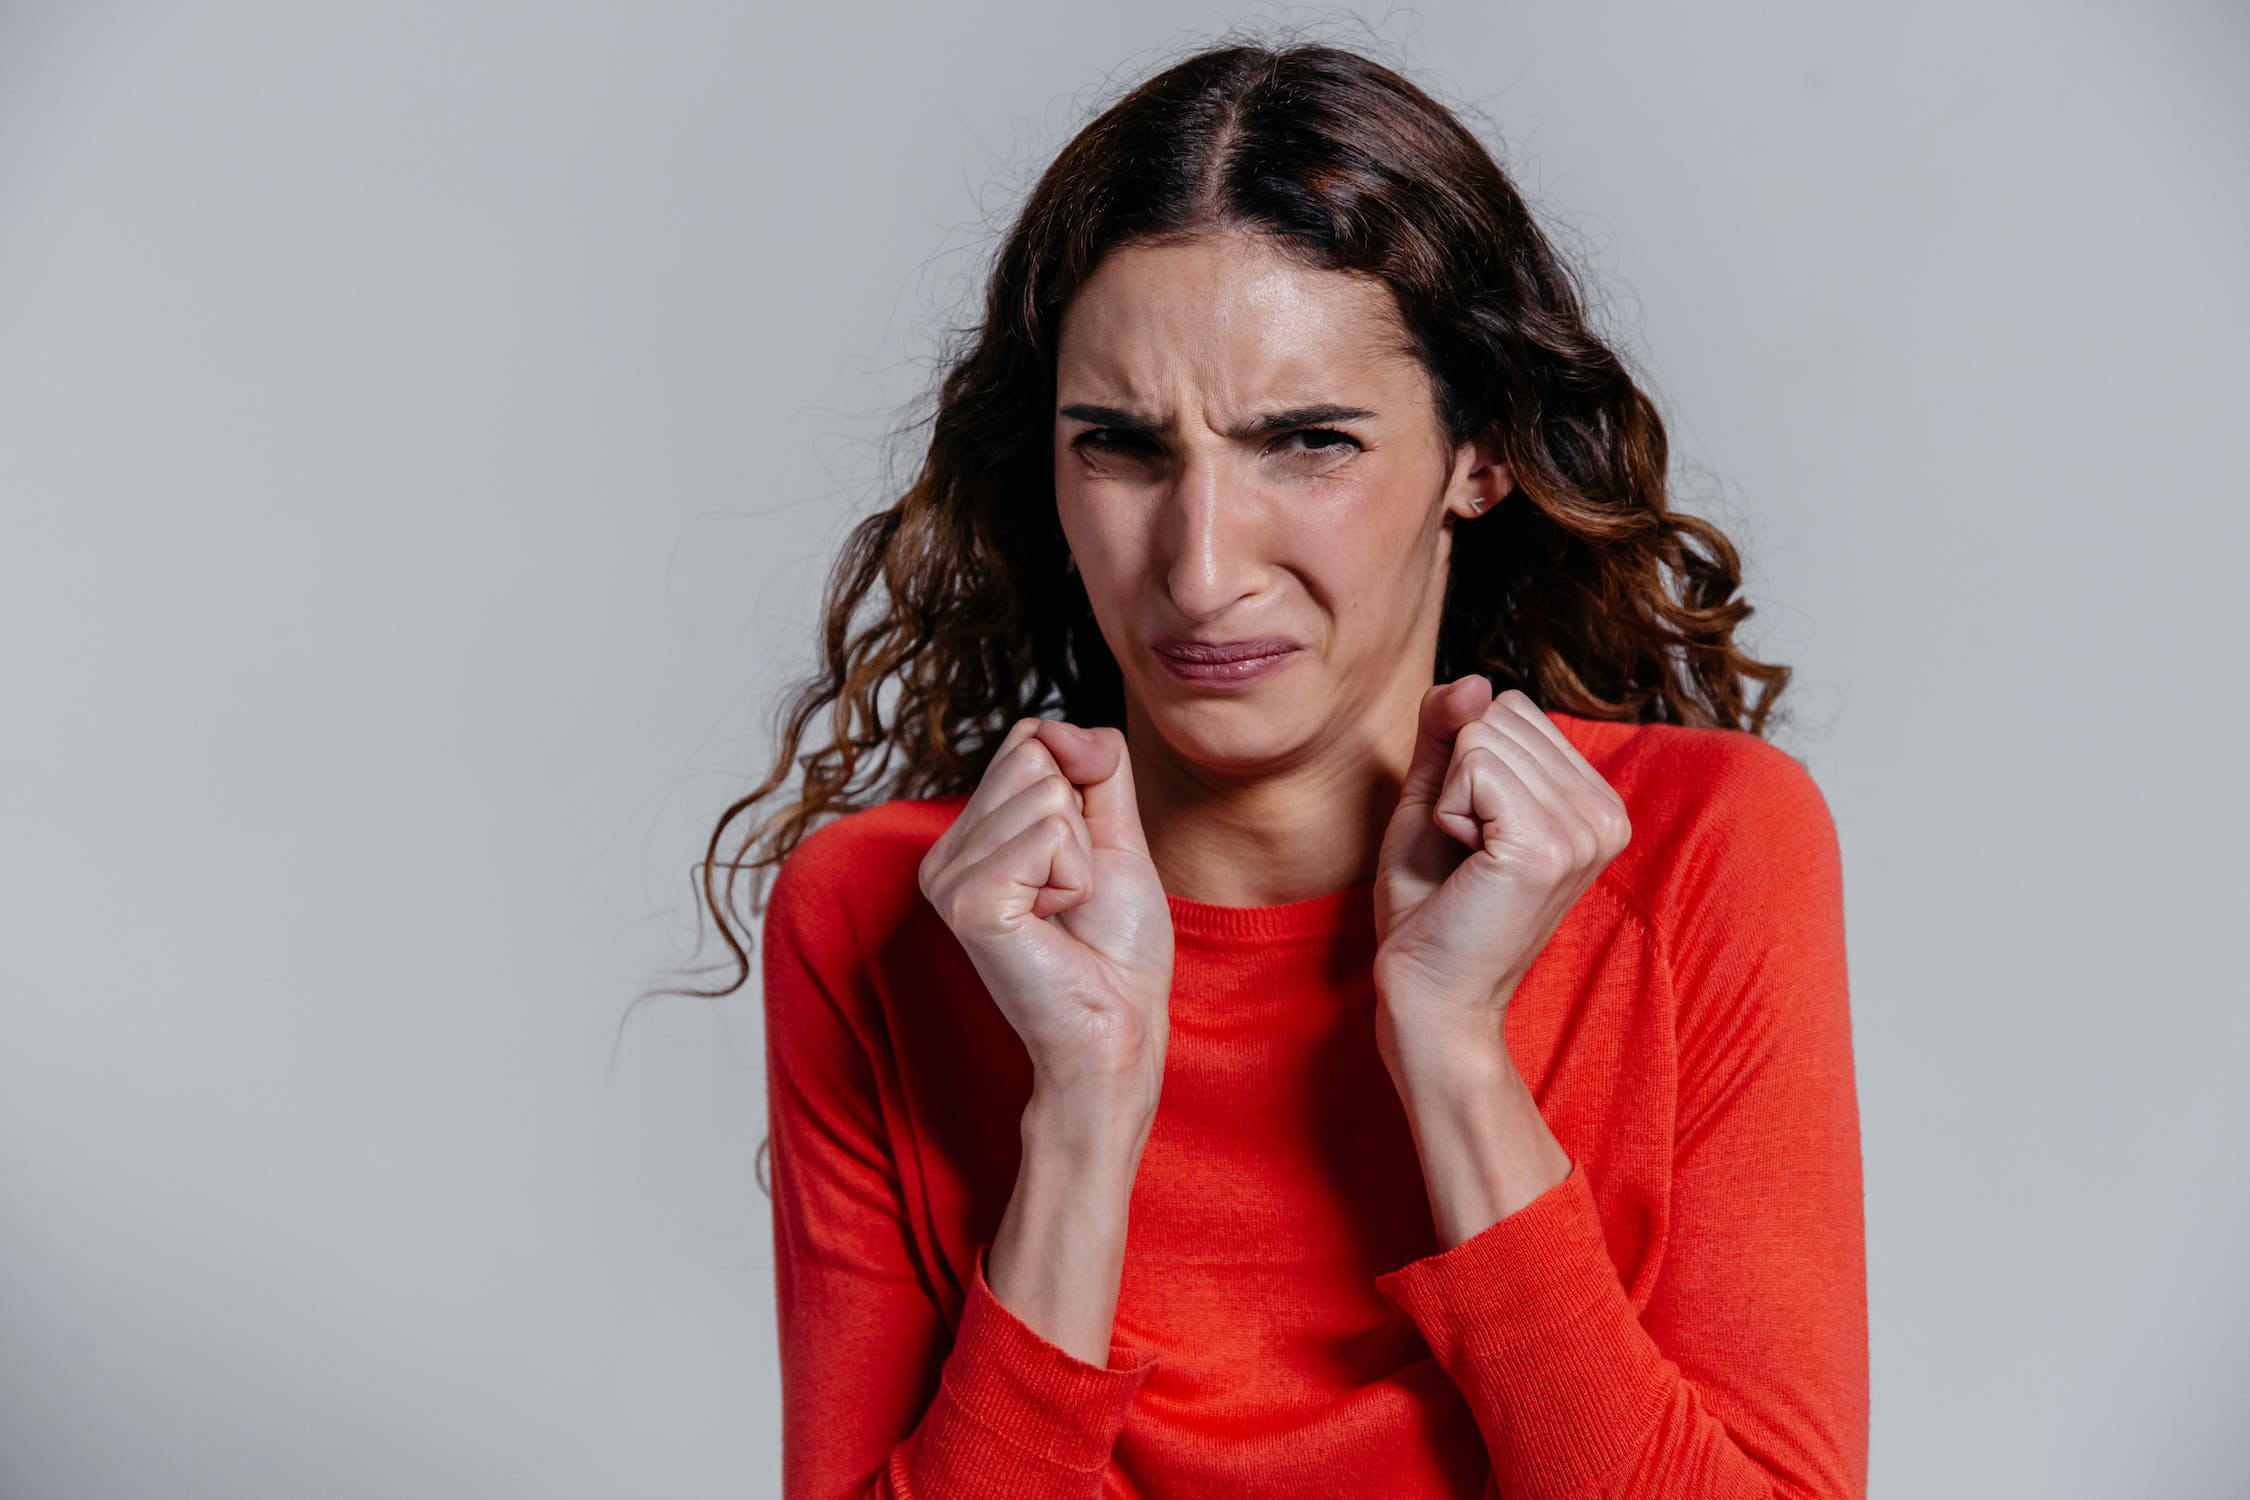

In [37]:
# SAMPLE 1

image = "/Users/sarbjitmadra/Desktop/Concordia/emotion_detection/images/image_002.jpeg"
PIL.Image.open(image)

In [42]:
prediction_visuals(image, model_2, class_names)

1/1 [==============================] - 0s 67ms/step
This image most likely belongs to sad .


In [43]:
# SAMPLE 2


image = "/Users/sarbjitmadra/Desktop/Concordia/emotion_detection/images/Surprised.jpeg"
PIL.Image.open(image)

In [44]:
prediction_visuals(image, model_2, class_names)

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to surprised .


In [45]:
# SAMPLE 3


image = "/Users/sarbjitmadra/Desktop/Concordia/emotion_detection/images/mad_woman.jpeg"
PIL.Image.open(image)

In [46]:
prediction_visuals(image, model_2, class_names)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to surprised .


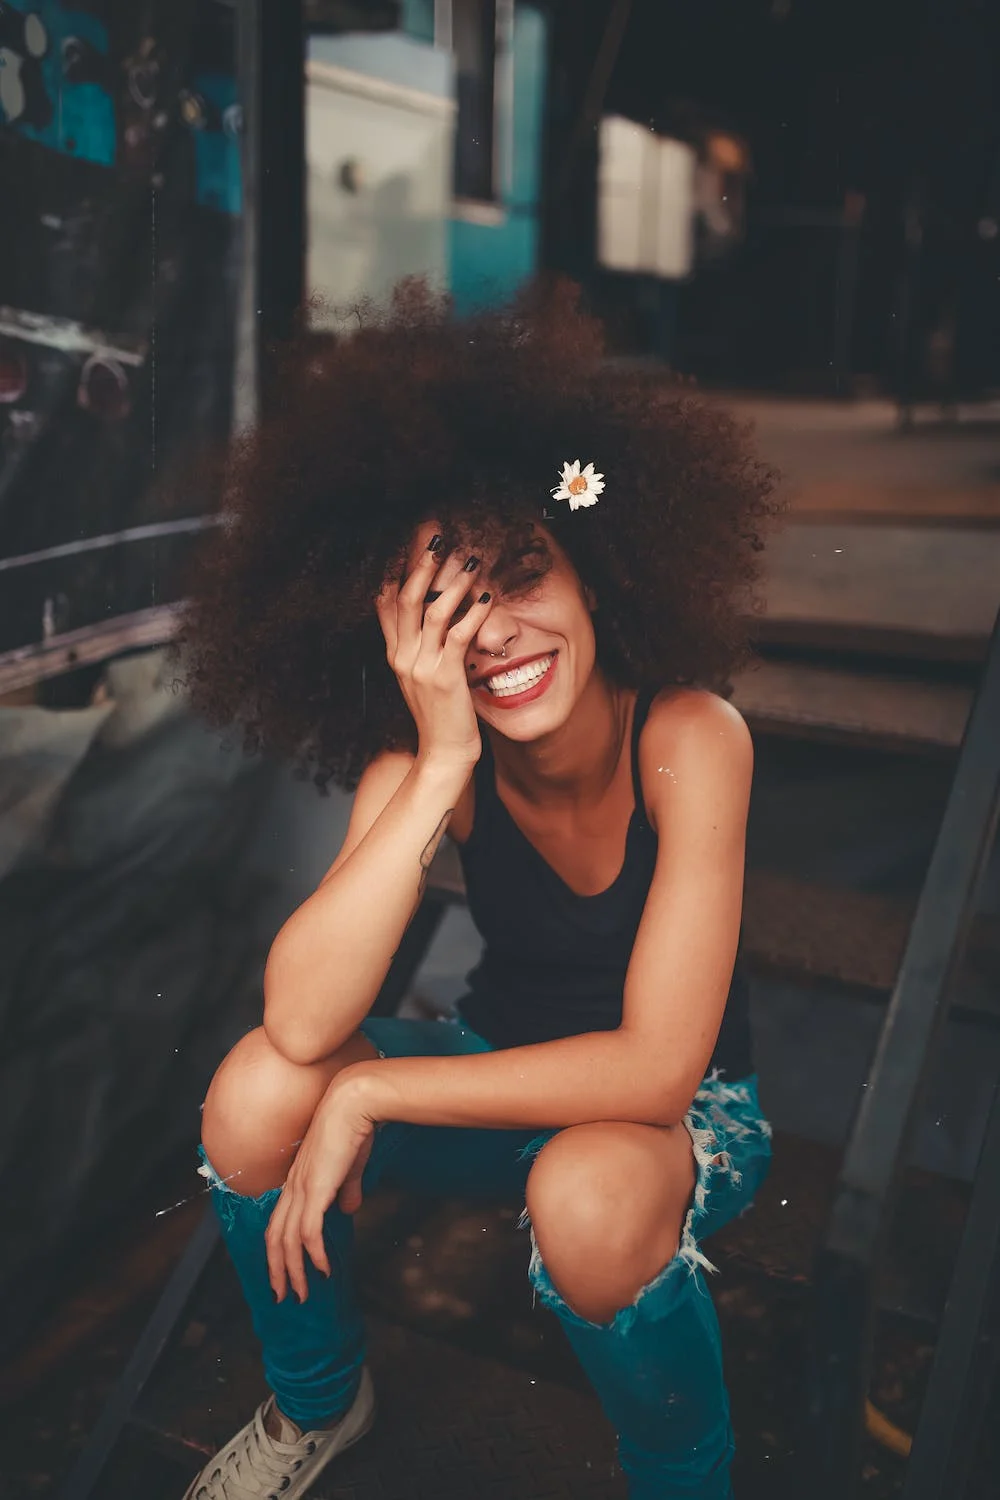

In [47]:
# SAMPLE 4 

image = "/Users/sarbjitmadra/Desktop/Concordia/emotion_detection/images/smile.webp"
PIL.Image.open(image)

In [49]:
prediction_visuals(image, model_2, class_names)

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to neutral .


In [50]:
# SAMPLE 5 

image = "/Users/sarbjitmadra/Desktop/Concordia/emotion_detection/images/sad.jpeg"
PIL.Image.open(image)

In [51]:
prediction_visuals(image, model_2, class_names)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to sad .


### CONCLUSION

Using pre-trained models in machine learning is very useful because it works faster and the accuracy score is usually high. However, even after using the EfficientNetB2 model, there was not much significant increase in the accuracy score compared to our original model.

As you can see, given that we could have trained the model more, the accuracy score has started becoming a little stagnant after the 24th epoch. The scores and the plots are showing signs of overfitting which you can see in the predictions. Out of 5 images, the model was able to correctly predict only 2 photos (2nd - surprised, 5th - sad).

Therefore, I conclude that this base case model did its best in predicting the emotions shown by people in the photos but it is not that good enough.